Tutorial from (https://www.youtube.com/watch?v=BfCPxoYCgo0)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)


Data

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(x_train.ndim , y_train.ndim)
print(x_test.ndim , y_test.ndim)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
3 1
3 1


Visualize Examples


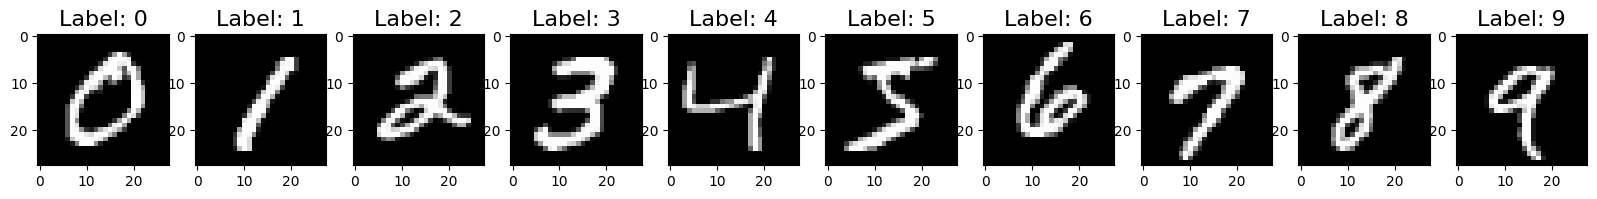

In [5]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [6]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes)

# for i in range(10):
#   print(y_train[i])

Prepare Data

In [8]:
#Normalize Data

x_train = x_train/255.0
x_test = x_test/255.0


In [9]:
#Reshape Data

x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

(60000, 784)


Create Model - Fully Connected Neural Network

In [14]:
# Build model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Train

In [15]:
batch_size = 512
epochs = 10
model.fit(x_train, y_train, batch_size=512, epochs=10)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7214 - loss: 1.0065
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9264 - loss: 0.2678
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9432 - loss: 0.2079
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9524 - loss: 0.1699
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9606 - loss: 0.1413
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9661 - loss: 0.1210
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9701 - loss: 0.1097
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9741 - loss: 0.0945
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9771 - loss: 0.0837
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9800 - loss: 0.0730


Evalute

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}", "Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9657 - loss: 0.1076
Test Loss: {} Test Accuracy: 0.09424898773431778


In [19]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.0616508e-05 8.2552539e-08 2.6105600e-04 ... 9.9797332e-01
  2.1840366e-05 4.0276569e-05]
 [8.9109026e-06 1.2352954e-03 9.9817139e-01 ... 2.4439561e-12
  1.3818566e-04 3.4537907e-11]
 [8.4281884e-05 9.9525273e-01 9.3731377e-04 ... 1.9388698e-03
  8.2300731e-04 2.5638861e-05]
 ...
 [1.1831548e-08 2.6888420e-09 1.1093828e-08 ... 2.1723430e-05
  2.1652103e-04 9.7759126e-04]
 [5.6161576e-07 3.3672176e-08 1.0854092e-08 ... 8.4571795e-08
  1.3751120e-04 1.8204457e-08]
 [2.5002821e-06 3.2478986e-09 9.7784186e-06 ... 3.2714670e-10
  4.7519055e-08 2.1181425e-08]]
[7 2 1 ... 4 5 6]


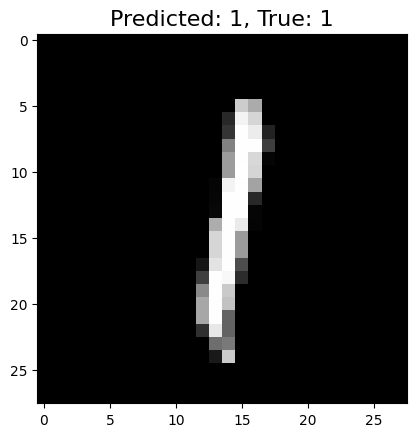

In [24]:
# Signal Example
ramdom_idx = np.random.choice(len(x_test))
x_sample = x_test[ramdom_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[ramdom_idx]
y_sample_pred_class = y_pred_classes[ramdom_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap="gray")

Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

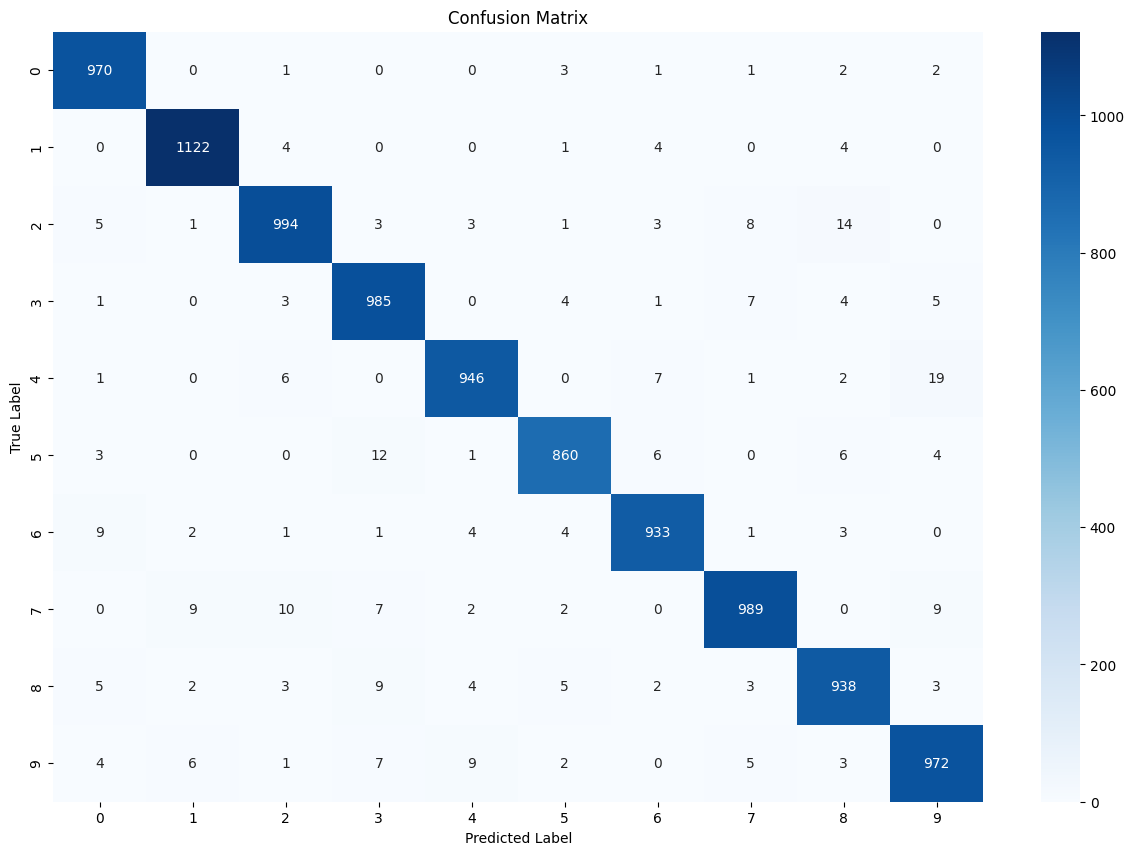

In [25]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")

Investigate Some Errors

In [32]:
errors = (y_pred_classes - y_true !=0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [29]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability = true_probability_errors

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last onces

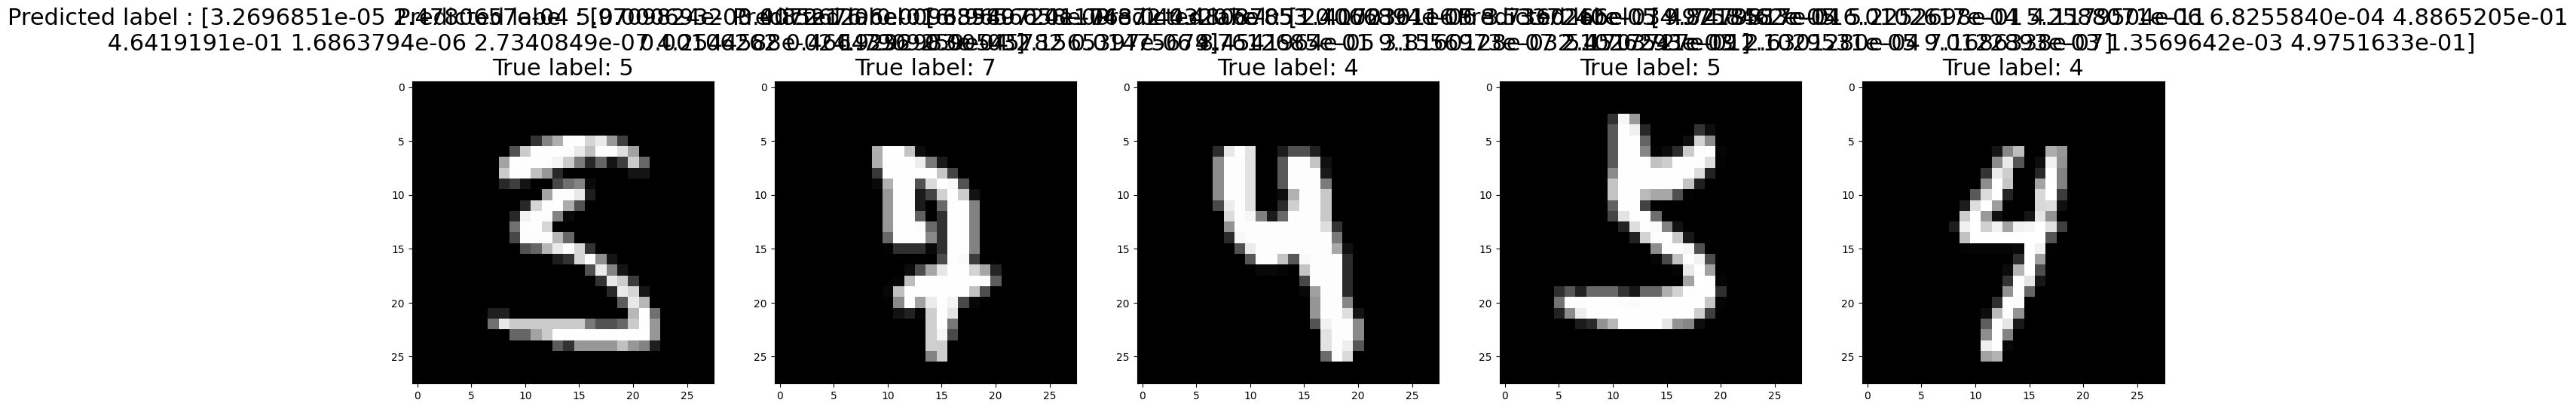

In [34]:
# show Top Errors

num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx= top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_errors[idx]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title("Predicted label : {}\nTrue label: {}".format(y_p,y_t), fontsize=22)
